# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Koen Weverink (14711982) & Jasper Timmer (12854328)

## Importing packages
Execute the following statement to import the packages `numpy` and `math` and the plotting package Matplotlib.

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

The `math` package contains functions such as $\tan$, $\exp$ and the factorial $n \mapsto n!$

In [16]:
# example: the factorial function
math.factorial(5)

120

If you want to access `math.factorial` without typing `math.` each time you use it, use `import from`. Same for `math.exp`

In [17]:
from math import factorial, exp, tan

factorial(5)

120

## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


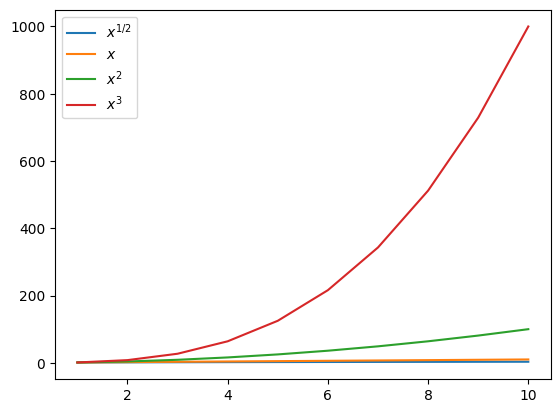

In [18]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

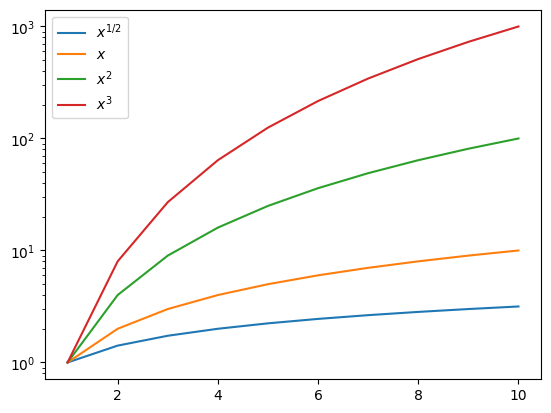

In [19]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


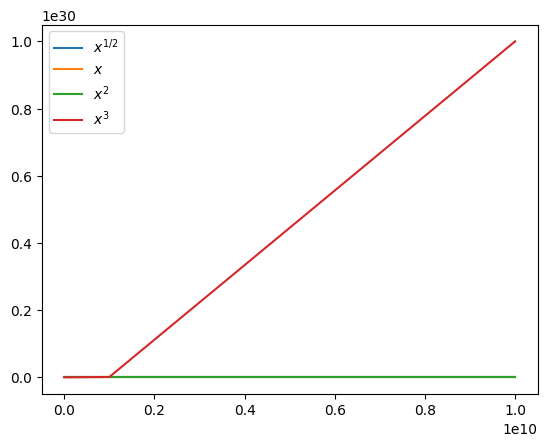

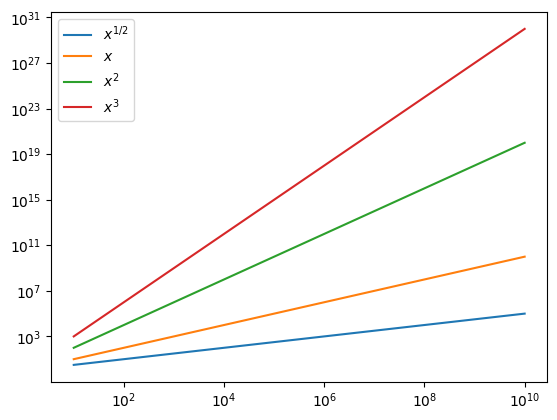

In [20]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Python float types
Information about the Python `float` type is in `sys.float_info`.

In [21]:
import sys

# printing float_info displays information about the python float type
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [22]:
# the individual properties can be accessed as follows
print("epsilon for the python float type: ", sys.float_info.epsilon)

epsilon for the python float type:  2.220446049250313e-16


-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

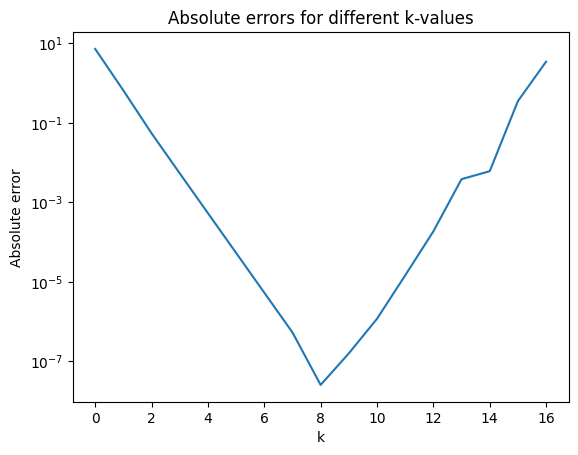

In [23]:
# Define the function to compute the value of the tangent at a given point.
def function(x):
    return tan(x)

# Define the derivative of the function.
def derivative(x):
    return 1 / (np.cos(x) ** 2)

# Define a function to numerically compute the derivative using the forward difference method.
def differentiate_a(function, k, x):
    # Calculate the step size based on the exponent k
    h = 10 ** -k 

    # Calculate the derivative
    derivative = (function(x + h) - function(x)) / h
    return derivative

# Parameters
x = 1
errors = []
ks = range(17)
for k in ks:
    # Calculate the absolute error and store it in the list.
    errors.append(abs(differentiate_a(function, k, x) - derivative(x)))

# Create a plot to visualize the absolute errors for different values of k
plt.plot(ks, errors)
plt.title('Absolute errors for different k-values')
plt.xlabel("k")
plt.ylabel("Absolute error")
plt.yscale('log')

There certainly is a minimum error, around $10^{-7}$ at $k = 8$. This corresponds to $h = 10^{-8}$, which, on this machine, roughly equals: 
$$\sqrt{\frac{\epsilon_{mach}}{2}}$$

## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

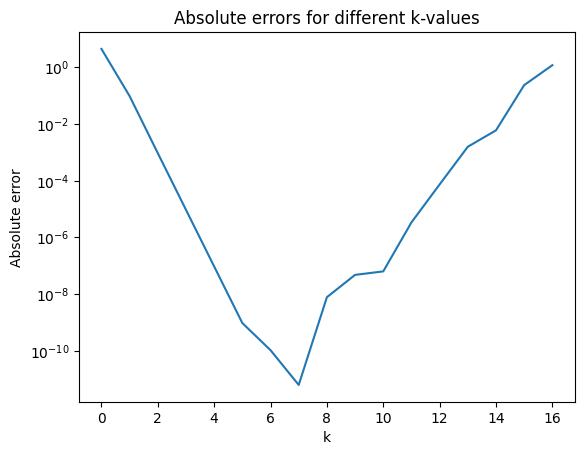

In [24]:
# Define the new differentiate function
def differentiate_b(function, k, x):
    h = 10 ** -k
    derivative = (function(x + h) - function(x - h)) / (2 * h)
    return derivative

# Parameters
x = 1
errors = []
ks = range(17)
for k in ks:
    # Calculate absolute difference
    errors.append(abs(differentiate_b(function, k, x) - derivative(x)))

# Create a plot to visualize the absolute errors for different values of k
plt.plot(ks, errors)
plt.title('Absolute errors for different k-values')
plt.xlabel("k")
plt.ylabel("Absolute error")
plt.yscale('log')

For this slightly different differentiation technique, the overall absolute error is lower than the previous differentiation approach. The very lowest error is 3 orders of magnitude smaller, which is a big improvement. Besides, the lowest value moved away from k of 8 to $k=7$, corresponding to $h=10^{-7}$.

-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

At some point, the new value of $e^x$ that will be added to the total sum will be lower than the $\epsilon$ for the Python float type. So the summing programm should stop when:

$$e^x < \epsilon_{mach} \sum_{n}^{k=1} \frac{x^k}{k!}$$

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

In [25]:
# Define a function to find the stopping point for the series expansion.
def find_stopping_point(x):
    for i in range(500):
        # Check if the next term in the series is smaller than the machine epsilon.
        if (x ** i) / (factorial(i)) <= sys.float_info.epsilon:
            return i - 1 # Return the index before which the series stops
        
# Define the function to compute e^x using the built-in function.
def function(x):
    return np.exp(x)

# Define a function to approximate e^x using a series expansion up to a stopping point.
def approximate_function(x, stopping_point):
    return sum([(x ** i) / (factorial(i)) for i in range(stopping_point + 1)])


xs = [-20, -15, -10, -5, -1, 1, 5, 10, 15, 20]

# Iterate through the values of x and compute the stopping point, approximate value, and relative error.
for x in xs:
    stopping_point = find_stopping_point(x)
    approximate = approximate_function(x, stopping_point)
    error = abs(function(x) - approximate) / function(x)
    print(f"Stopping point for x = {x}: i = {stopping_point}, which leads to approximately {approximate}, with a relative error of {error}")

Stopping point for x = -20: i = 0, which leads to approximately 1.0, with a relative error of 485165194.4097903
Stopping point for x = -15: i = 0, which leads to approximately 1.0, with a relative error of 3269016.3724721107
Stopping point for x = -10: i = 0, which leads to approximately 1.0, with a relative error of 22025.465794806714
Stopping point for x = -5: i = 0, which leads to approximately 1.0, with a relative error of 147.4131591025766
Stopping point for x = -1: i = 0, which leads to approximately 1.0, with a relative error of 1.718281828459045
Stopping point for x = 1: i = 17, which leads to approximately 2.7182818284590455, with a relative error of 1.6337129034990842e-16
Stopping point for x = 5: i = 35, which leads to approximately 148.41315910257657, with a relative error of 1.915039717654698e-16
Stopping point for x = 10: i = 51, which leads to approximately 22026.46579480671, with a relative error of 3.3032796463874436e-16
Stopping point for x = 15: i = 66, which leads t

As can be seen in the print-outs above, the exponential function is well-approximated for values $x>0$. For $x<0$, the relative error shows that these are faulty approximations. The explaination for this can be seen in the answers of question 2c.

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

If $x < 0$, even values of $x^k$ will be positive and odd values will be negative. This leads to alternating + and - signs, for example when $x = -1$: $\frac{(-1)^0}{0!} - \frac{(-1)^1}{1!} + \frac{(-1)^2}{2!} - \frac{(-1)^3}{3!} + ...$ 

As can be seen, the terms are subtracted alternately. When these terms are summed, the cancellation happens, since the positive and negative terms partially cancel each other out. This will lead to less accuracy and render obtaining a precise result impossible.

However, what we can do is see that $e^{-x} = \frac{1}{e^x}$ and write a program that uses this to obtain more accurate results that those mentioned above.

Below, a second program was written that checks if $x<0$. If that is the case, it calculates $\frac{1}{e^{-x}}$. Which here behaves as $\frac{1}{e^{x}}$, since $x$ is a negative number.

In [26]:
for x in xs:
    if x < 0:
        stopping_point = find_stopping_point(-1 * x)
        approximate = approximate_function(-1 * x, stopping_point) ** -1
    else:
        stopping_point = find_stopping_point(x)
        approximate = approximate_function(x, stopping_point)
    error = abs(function(x) - approximate) / function(x)
    print(f"Stopping point for x = {x}: i = {stopping_point}, which leads to approximately {approximate}, with a relative error of {error}")

Stopping point for x = -20: i = 81, which leads to approximately 2.0611536224385583e-09, with a relative error of 2.0065962176423985e-16
Stopping point for x = -15: i = 66, which leads to approximately 3.059023205018258e-07, with a relative error of 0.0
Stopping point for x = -10: i = 51, which leads to approximately 4.539992976248486e-05, with a relative error of 1.4925713791816933e-16
Stopping point for x = -5: i = 35, which leads to approximately 0.006737946999085469, with a relative error of 2.574557912391206e-16
Stopping point for x = -1: i = 17, which leads to approximately 0.3678794411714423, with a relative error of 1.508949536687701e-16
Stopping point for x = 1: i = 17, which leads to approximately 2.7182818284590455, with a relative error of 1.6337129034990842e-16
Stopping point for x = 5: i = 35, which leads to approximately 148.41315910257657, with a relative error of 1.915039717654698e-16
Stopping point for x = 10: i = 51, which leads to approximately 22026.46579480671, wi

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

To use the power series for negative values of $x$, we modified the function to $e^{-x}$, which leads to the series:
$$\sum^{\infty}_{n=0} \frac{(-1)^n}{n!}x^n = 1 - x + \frac{x^2}{2!} - \frac{x^3}{3!} + ...$$

This is implemented in the code block below. However, as can be seen by comparing the relative error between 2c and 2d, the relative error by rearranging the series is much higher than the $\frac{1}{e^x}$ version. This means that by rearranging the series in such a way does not produce more accurate results for $X<0$ 

In [27]:
# Define a function to approximate the exponential function for negative x values.
def approximate_function_negative(x, stopping_point):
    return sum([(((-1 * x) ** i) ) / (factorial(i)) for i in range(stopping_point + 1)])


xs = [-20, -15, -10, -5, -1, 1, 5, 10, 15, 20]

# Iterate through the values of x and compute the stopping point, approximate value, and relative error.
for x in xs:
    if x < 0:
        # For negative x, find the stopping point and approximate the reciprocal of e^x.
        stopping_point = find_stopping_point(-1*x)
        approximate = approximate_function_negative(-1 * x, stopping_point)
    else:
        # For non-negative x, find the stopping point and approximate e^x.
        stopping_point = find_stopping_point(x)
        approximate = approximate_function(x, stopping_point)

    # Calculate the relative error.
    error = abs(function(x) - approximate) / function(x)
    print(f"Stopping point for x = {x}: i = {stopping_point}, which leads to approximately {approximate}, with a relative error of {error}")

Stopping point for x = -20: i = 81, which leads to approximately 5.478102097164234e-10, with a relative error of 0.7342215525554533
Stopping point for x = -15: i = 66, which leads to approximately 3.0593423678230343e-07, with a relative error of 0.00010433487534611568
Stopping point for x = -10: i = 51, which leads to approximately 4.539992943350347e-05, with a relative error of 7.24629717713165e-09
Stopping point for x = -5: i = 35, which leads to approximately 0.006737946999086872, with a relative error of 2.085391909036877e-13
Stopping point for x = -1: i = 17, which leads to approximately 0.3678794411714423, with a relative error of 1.508949536687701e-16
Stopping point for x = 1: i = 17, which leads to approximately 2.7182818284590455, with a relative error of 1.6337129034990842e-16
Stopping point for x = 5: i = 35, which leads to approximately 148.41315910257657, with a relative error of 1.915039717654698e-16
Stopping point for x = 10: i = 51, which leads to approximately 22026.46